<a href="https://colab.research.google.com/github/rushilsaini-19/Python-Colab/blob/main/Team3_Finding_The_Cost_Of_Living_In_Different_US_States_And_Counties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finding the cost of living in different US states and counties project**


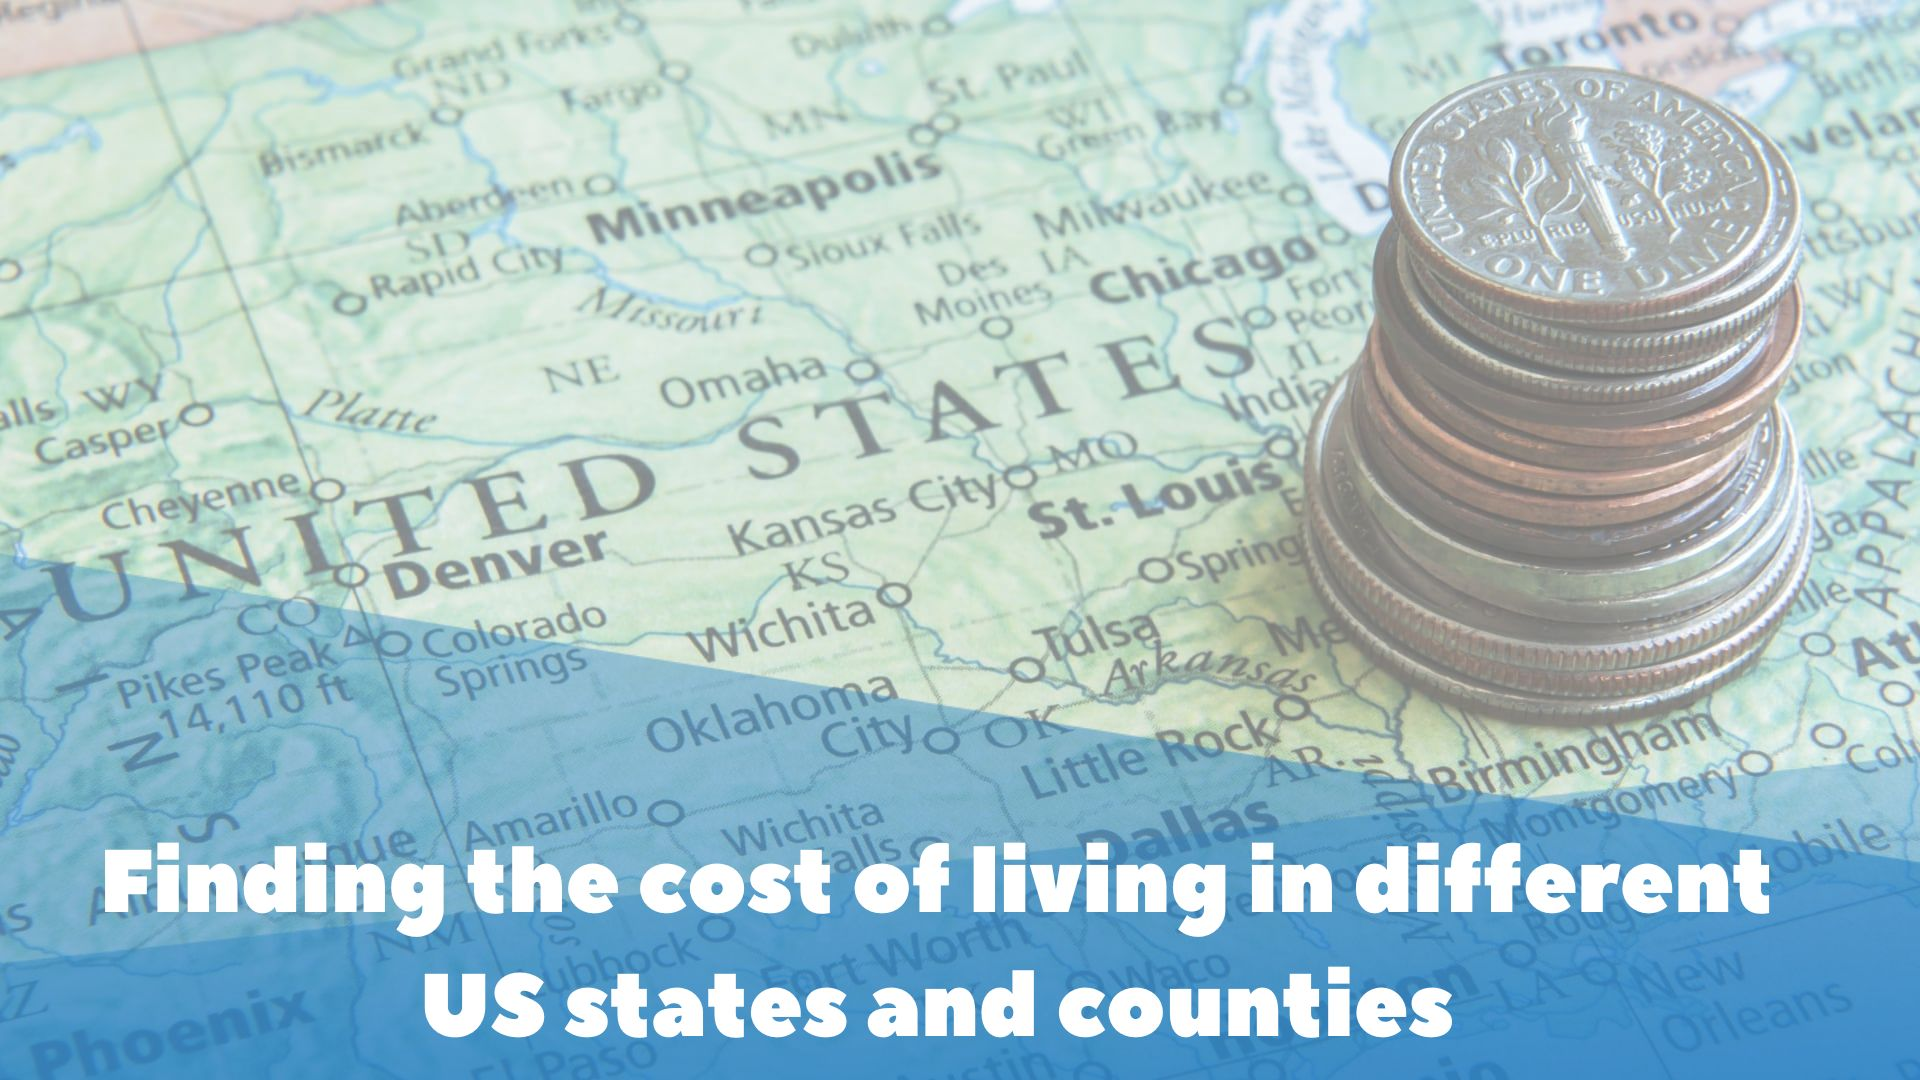


#Project Summary

**Problem definition**

This project aims to analyze and compare the cost of living across different counties and states in the United States by uncovering insights into factors such as housing costs, utilities, transportation, and groceries.

**Motivation**

As the international students obligated with student debt, understanding the financial implications of living in different areas is crucial for planning expenses and managing finances effectively. This analysis can provide valuable guidance for individuals in making decisions about where to reside and how to allocate resources to repay student loans.

**Data Source details**

[Dataset I](https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties)

*Cost of living information in 1877 US counties*

The dataset provides cost of living for ten family types in 1877 US counties. The significant cost of living are housing, food, transaportation, healthcare, childcare, and others.

This dataset can be obtained from the United States Department of Housing and Urban Development (HUD) or from the American Community Survey (ACS) conducted by the United States Census Bureau.

[Dataset II](https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-total.html)

*Population of US counties*

The dataset provides annual resident population categorized by demestic and international migrants from 2020 - 2023 in each US county.

This dataset can be obtained from US Census Bureau.

#Executive Summary of Key Observations

In our exploratory data analysis, we dived into two primary categories:
1. Counties
2. States

to obtain a comprehensive overview of the available information.

Our analysis was strategically focused on family configurations of 1 adult with no children (1p0c), 1 adult with 1 child (1p1c), and 2 adults with 2 children (2p2c). This focused approach was adopted for several key reasons:


📌 Firstly, our objective was to dissect the income and living costs in various areas, with a particular emphasis on the circumstances of international students. We initiated our exploration with the 1p0c setup to establish a foundational understanding of the basic expenses incurred by a single individual.


📌 Additionally, the transition to the 1p1c configuration was aimed at examining the financial implications of adding a child to the household, a scenario relevant due to the significant number of single-parent families.


📌 The selection of the 2p2c model was intended to encapsulate the financial dynamics of a conventional family structure, thereby providing insights into the economic challenges and considerations faced by such households.

The analysis reveals that housing and taxes are the largest components of living expenses, with housing having a more significant impact on smaller households, which is particularly relevant for international students who often live alone or with smaller families. Additionally, no direct correlation was found between median salary income and immigration rates at the county level, suggesting that international students should consider other factors beyond income when choosing where to settle.

However, the study identifies specific counties in Virginia, California, and Colorado that offer the highest income-cost differences, making them attractive options for international students looking to pay off their debt more efficiently. At the state level, Florida, California, Texas, New York, and Massachusetts emerged as the top states for international immigration in 2023, providing substantial education and employment opportunities for international students.

Cost-to-income ratios varied across states, with West Virginia being less affordable and North Dakota and Maryland being more affordable. This information is crucial for international students who must carefully balance their income and expenses while managing their student debt. Furthermore, childcare costs were found to be a significant consideration for families. International students with families should factor in these costs when making decisions about where to live.

The study also reveals that high migration areas generally have lower costs for housing, food, healthcare, and childcare compared to low migration areas. This suggests that international students may benefit from settling in these regions, as they offer well-supplied housing markets, affordable basic needs, robust infrastructure, accessible healthcare, and family-friendly policies.

#Notebook content

1. Uploading files

2. Merging Datasets and Data cleaning

3. Data Exploratory

    Regression analysis

    3.1 Overall Analysis

    3.2 County wise analysis
    
    Q3.2.1. Is there a correlation between the median income and International immigration rates in 2023?
    
    Q3.2.2. What is the best place for international students based on monetary savings to save money to settle debts?

    3.3 State wise analysis
    
    Q3.3.1. Which are the top 10 states that have the highest international immigrant in 2023?
    
    Q3.3.2. What is the cost-to-income ratio for each state?
    
    Q3.3.3 What is the average childcare cost in 1p0c households and 2p2c households?

# **1. Uploading files**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

from google.colab import drive
drive._mount('/content/drive')

population_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Population statistics.csv',encoding='latin1')
cost_of_living_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cost_of_living_us.csv')
states = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/states.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Merging Datasets and Data Cleaning**

In order to create a merged data set containing the cost of living data and the Population statistics, we had to first merge states.csv to ensure we had the same columns.

In [ ]:
#Changing column names in the data sets
population_data = population_data.rename(columns={'CTYNAME': 'Countyname'})
population_data = population_data.rename(columns={'COUNTY': 'Countynum'})
population_data = population_data.rename(columns={'STNAME': 'State'})
cost_of_living_data = cost_of_living_data.rename(columns={'county': 'Countyname'})
cost_of_living_data = cost_of_living_data.rename(columns={'state': 'Abbreviation'})


In [ ]:
#Creating State_County column in population_data file
df = pd.merge(population_data, states[['State', 'Abbreviation']], on='State', how='left')
df['State_County'] = df['Abbreviation'] + '_' + df['Countyname']


In [ ]:
# Creating State_County column in cost_of_living_data file
cost_of_living_data['State_County'] = cost_of_living_data['Abbreviation'] + '_' + cost_of_living_data['Countyname']

#assign the result to df2 for easier reference
df2 = cost_of_living_data



**Now that we have the same column in both our data sets, we can add the column that we require from the population statistics dataset to the cost of living data.**

In [ ]:
# Merge the datasets based on the 'State_County' column
main_df = pd.merge(df2, df[['State_County', 'State', 'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022', 'INTERNATIONALMIG2023']], on='State_County', how='left')


In [ ]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31440 entries, 0 to 31439
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31440 non-null  int64  
 1   Abbreviation            31440 non-null  object 
 2   isMetro                 31440 non-null  bool   
 3   areaname                31440 non-null  object 
 4   Countyname              31440 non-null  object 
 5   family_member_count     31440 non-null  object 
 6   housing_cost            31440 non-null  float64
 7   food_cost               31440 non-null  float64
 8   transportation_cost     31440 non-null  float64
 9   healthcare_cost         31440 non-null  float64
 10  other_necessities_cost  31440 non-null  float64
 11  childcare_cost          31440 non-null  float64
 12  taxes                   31440 non-null  float64
 13  total_cost              31440 non-null  float64
 14  median_family_income    31430 non-null

📢 **Summary of your critical observations:**
It is noticable that INTERNATIONALMIG2023 and median_family_income contain a minimal number of null values. Considering their negligible impact on the overall dataset, it is advisable to proceed with the exclusion of these entries to maintain the integrity and accuracy of the analysis.


In [ ]:
main_df.dropna(inplace=True)
main_df.info()
# now we have dataframe with no Null value

<class 'pandas.core.frame.DataFrame'>
Index: 31310 entries, 0 to 31439
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31310 non-null  int64  
 1   Abbreviation            31310 non-null  object 
 2   isMetro                 31310 non-null  bool   
 3   areaname                31310 non-null  object 
 4   Countyname              31310 non-null  object 
 5   family_member_count     31310 non-null  object 
 6   housing_cost            31310 non-null  float64
 7   food_cost               31310 non-null  float64
 8   transportation_cost     31310 non-null  float64
 9   healthcare_cost         31310 non-null  float64
 10  other_necessities_cost  31310 non-null  float64
 11  childcare_cost          31310 non-null  float64
 12  taxes                   31310 non-null  float64
 13  total_cost              31310 non-null  float64
 14  median_family_income    31310 non-null  flo

In [ ]:
#coverting "family_member_count" column into two column with integer value for future calculation
main_df[['Parent', 'Children']] = main_df['family_member_count'].str.extract(r'(\d+)p(\d+)c')
main_df[['Parent', 'Children']] = main_df[['Parent', 'Children']].astype(int)


🔎 **Declare the use of Gen AI**

ChatGPT prompt for the below code:

I want to convert data in this column "family_member_count" to different format. For example the data in that column is 1p1c. I want to create additional two columns called "Parent" and Children". Then put the number in front of p, in this case is 1 in the "Parent" column and number in front of c, which is also 1 in the "Children" column.

In [ ]:
#Update the dataframe to only contain the family member counts we wish to retain

family_count= ['1p0c', '1p1c', '2p2c']
main_df = main_df[main_df['family_member_count'].isin(family_count)]
main_df = main_df.reset_index(drop=True)


# **3. Data Exploratory**

To streamline our analysis, we decided to concentrate solely on family setups with 1 adult and no children (1p0c), 1 adult and 1 child (1p1c), and 2 adults and 2 children (2p2c) for a few key reasons:

* Firstly, our aim is to understand the income and cost associated to living in particular area, especially for international students. Hence, we began by examining the expenses associated with a single individual (1p0c) to establish a baseline understanding.

* Moreover, we wanted to explore the changes when a child is added, which is important given the prevalence of single-parent households (1p1c).

* Lastly, we chose the 2p2c configuration as it represents a typical family structure, allowing us to gain insights into the expenses faced by such households.










In [ ]:
#Adding a column with the total number of family members
main_df['Total_Family_Members'] = main_df['Parent'] + main_df['Children']



##**Regression Analysis**

In [ ]:
import statsmodels.api as sm

# Select the relevant columns for regression
regression_data = main_df_state[['INTERNATIONALMIG2023', 'housing_cost', 'food_cost', 'transportation_cost',
                                 'healthcare_cost', 'childcare_cost', 'taxes']]

# Add a constant term to the independent variables
X = sm.add_constant(regression_data[['housing_cost', 'food_cost', 'transportation_cost',
                                     'healthcare_cost', 'childcare_cost', 'taxes']])
y = regression_data['INTERNATIONALMIG2023']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     INTERNATIONALMIG2023   R-squared:                       0.158
Model:                              OLS   Adj. R-squared:                  0.122
Method:                   Least Squares   F-statistic:                     4.465
Date:                  Tue, 23 Apr 2024   Prob (F-statistic):           0.000357
Time:                          23:50:54   Log-Likelihood:                -1775.7
No. Observations:                   150   AIC:                             3565.
Df Residuals:                       143   BIC:                             3587.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

**📢 Summary of critical observations:**
The regression model aims to explain the relationship between the international migration rate in 2023 (INTERNATIONALMIG2023) and various cost components (housing, food, transportation, healthcare, childcare, taxes).

The R-squared value of 0.158 indicates that approximately 15.8% of the variation in the international migration rate can be explained by the included cost components.

However, this suggests that there are other important factors not captured in the model that influence migration rates. The adjusted R-squared value of 0.122 is lower than the R-squared, indicating that the model's explanatory power is reduced when considering the number of independent variables.

However, none of the individual coefficients are statistically significant at the 5% level (p-values > 0.05), so we cannot make strong conclusions about their individual effects.

#3.1 OVERALL ANALYSIS

**3.1.1 What is the overall breakdown of cost components for different family types**

In [ ]:
import plotly.graph_objects as go

family_configs = ['1p0c', '1p1c', '2p2c']
cost_components = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'childcare_cost', 'taxes']

# Define color mapping for cost components
color_map = {
    'housing_cost': '#1f77b4',
    'food_cost': '#ff7f0e',
    'transportation_cost': '#2ca02c',
    'healthcare_cost': '#d62728',
    'childcare_cost': '#9467bd',
    'taxes': '#8c564b'
}

for config in family_configs:
    data = main_df_state[main_df_state['family_member_count'] == config]

    percentages = [data[component].mean() / data['total_cost'].mean() * 100 for component in cost_components]

    fig = go.Figure(data=[go.Pie(
        labels=cost_components,
        values=percentages,
        hole=.4,
        marker=dict(colors=[color_map[component] for component in cost_components])
    )])

    fig.update_layout(title=f'Percentage Breakdown of Cost Components - {config}')
    fig.show()

**📢 Summary of critical observations:**

Housing cost and taxes are the two largest components across all family configurations, indicating that these are the main drivers of living expenses regardless of household size.
The proportion of housing cost decreases as family size increases:
For 1p0c (single person), housing cost accounts for 32.4% of total cost.

For 1p1c (single parent with one child), housing cost is 23.1% of total cost.

For 2p2c (couple with two children), housing cost is 21% of total cost. This suggests that housing expenses have a relatively larger impact on smaller households.

Food cost remains relatively constant across all family configurations, ranging from 15.1% to 15.6% of total cost.

Transportation cost shows a slight increase as family size grows:

For 1p0c, transportation cost is 10% of total cost.

For 1p1c and 2p2c, transportation cost is around 13% of total cost.

This suggests that larger families may have higher transportation expenses due to increased travel needs.

##3.2 COUNTY WISE ANALYSIS

❓ Questions for County wise analysis: ❓

1. Is there a correlation between the median income and International immigration rates in 2023?

2. What is the best place for international students based on monetary savings to save money to settle debts?


**Q3.2.1 Is there a correlation between the median income and Internation immigration rates in 2023?**

In [ ]:
# Find the maximum value of INTERNATIONALMIG2023
max_value = main_df['INTERNATIONALMIG2023'].max()

# Find the row with the maximum value of INTERNATIONALMIG2023
max_row = main_df[main_df['INTERNATIONALMIG2023'] == max_value]

# Get the State_County from the row with the maximum value
max_state_county = max_row['State_County'].values[0]

# Get the number of international migration from the row with the maximum value
max_international_migration = max_row['INTERNATIONALMIG2023'].values[0]

# Display the result
print("The State_County with the maximum INTERNATIONALMIG2023 is:", max_state_county)
print("The number of international migration for this State_County is:", max_international_migration)

The State_County with the maximum INTERNATIONALMIG2023 is: FL_Miami-Dade County
The number of international migration for this State_County is: 54457.0


🔎 **AI Declaration:** I used Chat GPT to correct the code in line max_state_county where the index used should have been 0 and I used 1. The explanation given by the tool is: Since max_row is a DataFrame with only one row (assuming there is a unique maximum value), accessing the value at index 1 will raise an IndexError because there is no second element in the values array. The correct index should be [0] to access the first (and only) value.

Text(0.5, 1.0, 'Median Family Income vs. International Migration (2023) (Graph 1)')

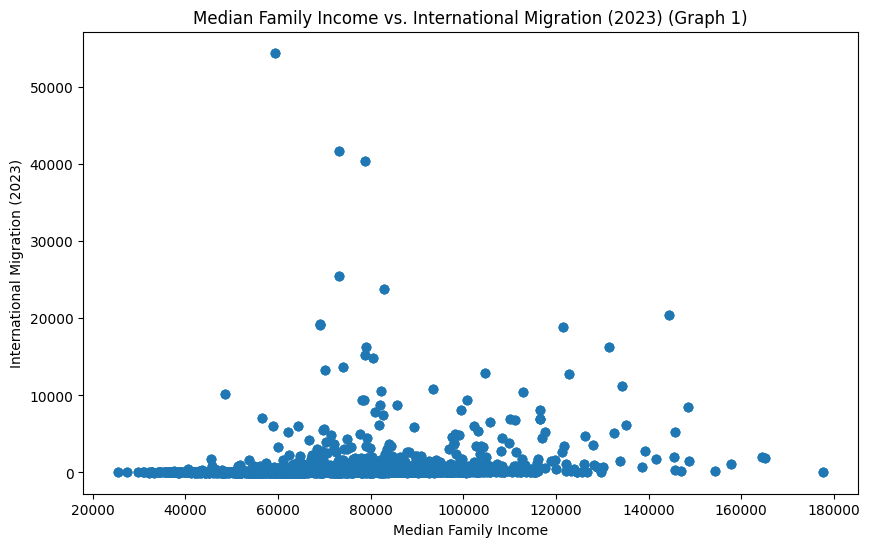

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(main_df['median_family_income'], main_df['INTERNATIONALMIG2023'])

plt.xlabel('Median Family Income')
plt.ylabel('International Migration (2023)')
plt.title('Median Family Income vs. International Migration (2023) (Graph 1)')

📢 **Summary of critical observations:**
From this chart, we can infer that there is no direct correlation between the median salary income and immigration rates. It can be assumed that the State_County with the highest immigration (FL_Miami-Dade County) offers other aspects that are non monetary.

**Q3.2.2. What is the best place for international students based on monetary savings to save money to settle debts?**

#For 1P0C(no children)

<ipython-input-17-2ee79712a923>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']


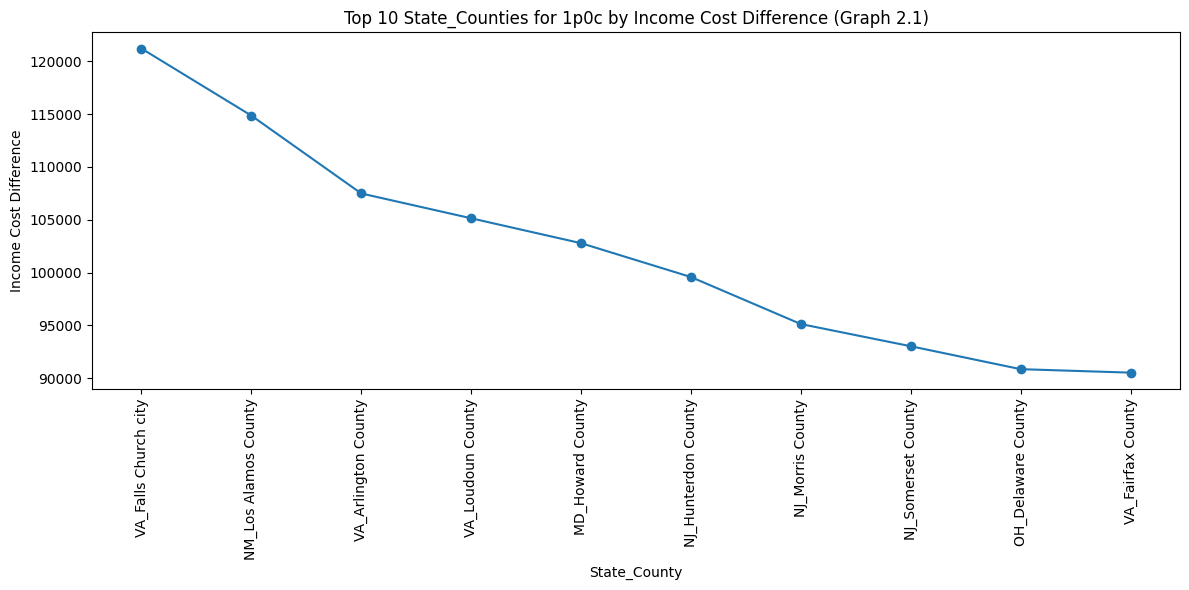

Top 10 State_Counties for a family of 1p0c:
              State_County  income_cost_diff
8742  VA_Falls Church city     121210.777550
5397  NM_Los Alamos County     114859.983300
8445   VA_Arlington County     107493.398625
8583     VA_Loudoun County     105143.071675
3585      MD_Howard County     102785.900950
5319   NJ_Hunterdon County      99582.943500
5331      NJ_Morris County      95131.763925
5343    NJ_Somerset County      93032.435975
6156    OH_Delaware County      90861.890513
8511     VA_Fairfax County      90533.094200


In [ ]:
# Filter the DataFrame for family_member_count of '1p0c'
filtered_df = main_df[main_df['family_member_count'] == '1p0c']

# Calculate the difference between median_family_income and total_cost_living
filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']

# Sort the DataFrame based on the income_cost_diff column in descending order
sorted_df = filtered_df.sort_values('income_cost_diff', ascending=False)

# Display the top 10 results
top_10_results = sorted_df[['State_County', 'income_cost_diff']].head(10)
# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(top_10_results['State_County'], top_10_results['income_cost_diff'], marker='o')

# Set the x-label, y-label, and title
plt.xlabel('State_County')
plt.ylabel('Income Cost Difference')
plt.title('Top 10 State_Counties for 1p0c by Income Cost Difference (Graph 2.1)')

plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()
print("Top 10 State_Counties for a family of 1p0c:")
print(top_10_results)

🔎 **AI declaration**
Used Chat GPT to understand how to rotate the x labels for better readability


📢 **Summary of critical observations for 1p0c configuration:**
From our analysis, it is evident that the expenses associated with a single individual (1p0c) vary significantly across different areas. Understanding these expenses is crucial for international students, as it provides a baseline understanding of the cost of living in particular areas.

*   As you can clearly see, "VA_Falls Church" city has highest income cost difference.

*This information can help students make informed decisions about where to reside based on their financial constraints and preferences.*

*From this, we can see that for a single person household where an International student is looking at paying off is student debt, the above 10 counties are the best option to pay off their debt quickly. The limitation of this data is that it does not contain any employement statistics or happiness index which may be very important for them to consider where they wish to live.*

#For 1P1C(1 adult with 1 child)

<ipython-input-18-56a1674a574f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']


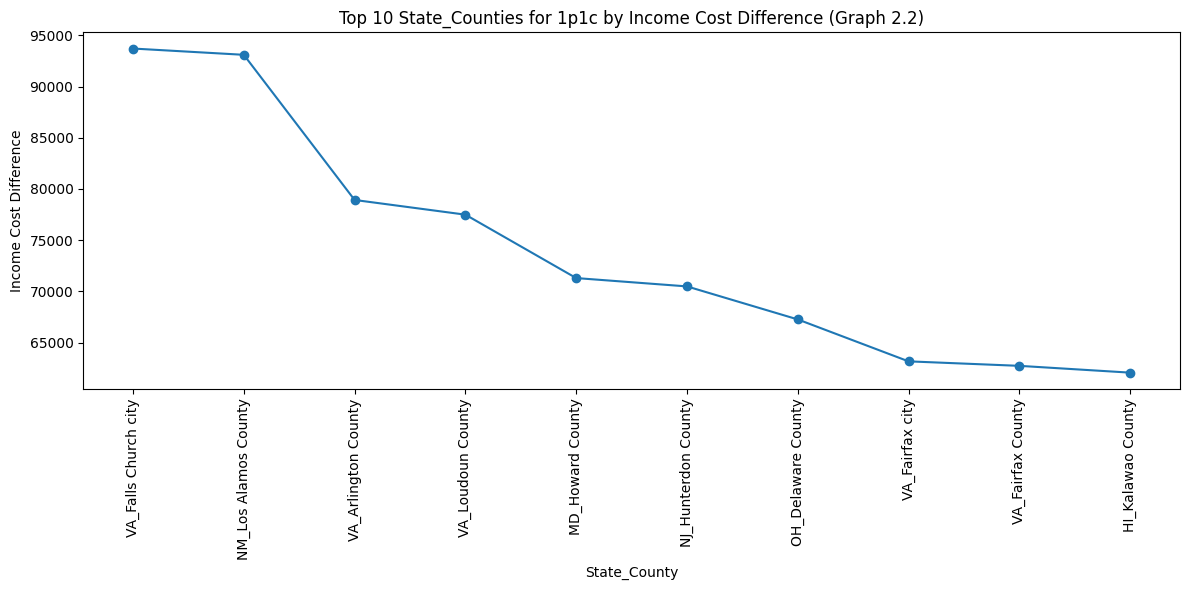

Top 10 State_Counties for a family of 1p1c:
              State_County  income_cost_diff
8743  VA_Falls Church city      93710.820350
5398  NM_Los Alamos County      93098.466900
8446   VA_Arlington County      78927.327825
8584     VA_Loudoun County      77491.802875
3586      MD_Howard County      71301.284950
5320   NJ_Hunterdon County      70487.561100
6157    OH_Delaware County      67263.451312
8740       VA_Fairfax city      63169.768075
8512     VA_Fairfax County      62731.695800
1621     HI_Kalawao County      62067.695463


In [ ]:
# Filter the DataFrame for family_member_count of '1p0c'
filtered_df = main_df[main_df['family_member_count'] == '1p1c']

# Calculate the difference between median_family_income and total_cost_living
filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']

# Sort the DataFrame based on the income_cost_diff column in descending order
sorted_df = filtered_df.sort_values('income_cost_diff', ascending=False)

# Display the top 10 results
top_10_results = sorted_df[['State_County', 'income_cost_diff']].head(10)
# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(top_10_results['State_County'], top_10_results['income_cost_diff'], marker='o')

# Set the x-label, y-label, and title
plt.xlabel('State_County')
plt.ylabel('Income Cost Difference')
plt.title('Top 10 State_Counties for 1p1c by Income Cost Difference (Graph 2.2)')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()

print("Top 10 State_Counties for a family of 1p1c:")
print(top_10_results)

📢 **Summary of critical observations for 1p1c configuration:**
Our exploration into the expenses incurred when a child is added to the household (1p1c) sheds light on the financial implications for single-parent households. This analysis is particularly relevant due to the prevalence of single-parent households, as it allows us to understand the changes in expenses and financial challenges faced by such families.

*   As you can clearly see, "VA_Falls Church city" has highest income cost difference and "HI_Kalawao County" with lowest one.

*By examining these changes, we can provide valuable insights to support financial planning and decision-making for single parents, including international students.*


#For 2P2C(2 adults with 2 children)

<ipython-input-19-703aff7049ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']


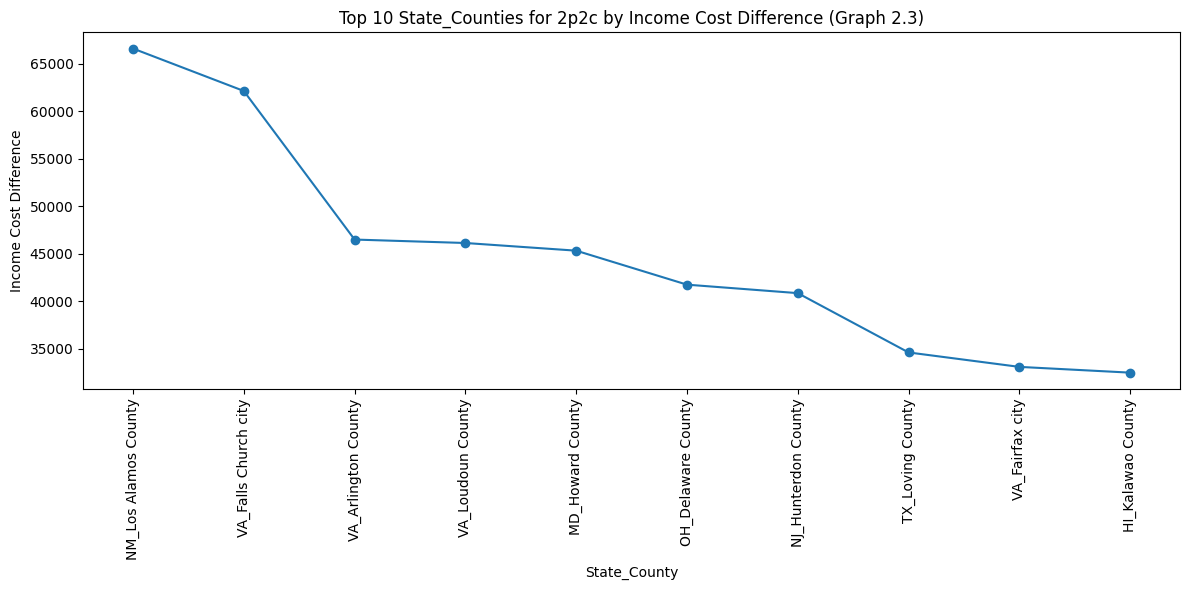

Top 10 State_Counties for a family of 2p2c:
              State_County  income_cost_diff
5399  NM_Los Alamos County      66614.601300
8744  VA_Falls Church city      62148.488750
8447   VA_Arlington County      46509.632625
8585     VA_Loudoun County      46146.835675
3587      MD_Howard County      45339.671350
6158    OH_Delaware County      41761.921312
5321   NJ_Hunterdon County      40869.972300
7988      TX_Loving County      34627.458975
8741       VA_Fairfax city      33107.886475
1622     HI_Kalawao County      32501.201463


In [ ]:
# Filter the DataFrame for family_member_count of '1p0c'
filtered_df = main_df[main_df['family_member_count'] == '2p2c']

# Calculate the difference between median_family_income and total_cost_living
filtered_df['income_cost_diff'] = filtered_df['median_family_income'] - filtered_df['total_cost']

# Sort the DataFrame based on the income_cost_diff column in descending order
sorted_df = filtered_df.sort_values('income_cost_diff', ascending=False)

# Display the top 10 results
top_10_results = sorted_df[['State_County', 'income_cost_diff']].head(10)
# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(top_10_results['State_County'], top_10_results['income_cost_diff'], marker='o')

# Set the x-label, y-label, and title
plt.xlabel('State_County')
plt.ylabel('Income Cost Difference')
plt.title('Top 10 State_Counties for 2p2c by Income Cost Difference (Graph 2.3)')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()

print("Top 10 State_Counties for a family of 2p2c:")
print(top_10_results)

📢 **Summary of critical observations for 2p2c configuration:**
The analysis of the 2p2c configuration, representing a typical family structure, provides valuable insights into the expenses faced by such households. By examining the financial dynamics of a conventional family structure, we can identify the economic challenges and considerations relevant to families with children.

*   As you can clearly see, "NM_Los Alamos" County has highest income cost difference and "HI_Kalawao" County with lowest one.

This information is essential for international students and families planning to relocate, as it allows them to anticipate and prepare for the expenses associated with maintaining a family household in different areas.


##3.3 STATE WISE ANALYSIS
We need to create new data frame that contains the data for each state summarised


In [ ]:
main_df.head()

,case_id,Abbreviation,isMetro,areaname,Countyname,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,median_family_income,State_County,State,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,INTERNATIONALMIG2023,Parent,Children,Total_Family_Members
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,73010.414062,AL_Autauga County,Alabama,0.0,15.0,22.0,34.0,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,73010.414062,AL_Autauga County,Alabama,0.0,15.0,22.0,34.0,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,...,73010.414062,AL_Autauga County,Alabama,0.0,15.0,22.0,34.0,2,2,4
3,2,AL,True,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,1p0c,8616.00000,3714.29484,10731.65256,5593.47984,...,77884.757812,AL_Baldwin County,Alabama,11.0,105.0,250.0,291.0,1,0,1
4,2,AL,True,"Daphne-Fairhope-Foley, AL MSA",Baldwin County,1p1c,11064.00000,5473.96836,11522.93844,8444.00688,...,77884.757812,AL_Baldwin County,Alabama,11.0,105.0,250.0,291.0,1,1,2


In [ ]:
#group df2 by state AND family_member_count
main_df_state = main_df.groupby(['State', 'Abbreviation', 'family_member_count'], as_index=False).agg({
    'housing_cost': 'mean',
    'food_cost': 'mean',
    'transportation_cost': 'mean',
    'healthcare_cost': 'mean',
    'other_necessities_cost': 'mean',
    'childcare_cost': 'mean',
    'taxes': 'mean',
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'INTERNATIONALMIG2020': 'sum',
    'INTERNATIONALMIG2021': 'sum',
    'INTERNATIONALMIG2022': 'sum',
    'INTERNATIONALMIG2023': 'sum'
})
main_df_state

,State,Abbreviation,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,INTERNATIONALMIG2023
0,Alabama,AL,1p0c,6414.950821,3275.597499,10966.870205,5691.536371,3511.267841,0.000000,5672.986617,35533.209367,58099.871502,125.0,1806.0,4374.0,5384.0
1,Alabama,AL,1p1c,8498.130792,4827.434642,11667.439888,8541.031239,4828.377883,5108.267991,5832.052646,49302.735116,58099.871502,125.0,1806.0,4374.0,5384.0
2,Alabama,AL,2p2c,8498.130792,9465.854196,14213.029952,17082.062454,6509.060174,12667.575079,8778.431966,77214.144913,58099.871502,125.0,1806.0,4374.0,5384.0
3,Alaska,AK,1p0c,10259.142857,3419.812766,10142.445480,6258.183450,4956.425057,0.000000,5447.650714,40483.659900,80510.056920,63.0,866.0,2339.0,1990.0
4,Alaska,AK,1p1c,14435.571429,5037.211037,10820.664643,9392.514227,7055.757043,10725.754800,6816.143781,64283.616814,80510.056920,63.0,866.0,2339.0,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wisconsin,WI,1p1c,9739.454877,4624.500642,11862.204232,7948.106267,5204.627567,9335.197123,6940.722945,55654.813583,74495.815864,215.0,3189.0,7906.0,13653.0
146,Wisconsin,WI,2p2c,9739.454877,9067.931855,14893.677950,15896.212600,6814.657898,16041.765800,8886.865043,81340.565933,74495.815864,215.0,3189.0,7906.0,13653.0
147,Wyoming,WY,1p0c,7681.043478,3449.503690,11839.099685,7201.375534,4033.036179,0.000000,5288.969838,39493.028765,78918.055027,18.0,134.0,364.0,322.0
148,Wyoming,WY,1p1c,10105.043478,5083.730030,13067.244694,10804.511186,5503.491616,8474.587617,5835.672548,58874.281461,78918.055027,18.0,134.0,364.0,322.0


❓ **Questions for State-based analysis:** ❓
1. Which are the top 10 states that have the highest international immigrant in 2023?
2. what is the cost-to-income ratio for each state?
3. What is the average childcare cost in 1p0c households and 2p2c households?
4. What are the migration trends in states with highest international immigration?
5. What is the proportion of Cost Components for Top 10 States with Highest International Migration?

**Q3.3.1. Which are the top 10 states that have the highest international immigrant in 2023?**

In [ ]:
#selecting part of main_df_state as an input for the bar graph + sort value
#The reason
df_top_state_int_immigrant = main_df_state[main_df_state['family_member_count'].isin(['1p0c'])].loc[:, ['State','INTERNATIONALMIG2023' ]].sort_values(by='INTERNATIONALMIG2023', ascending=False).reset_index(drop=True)

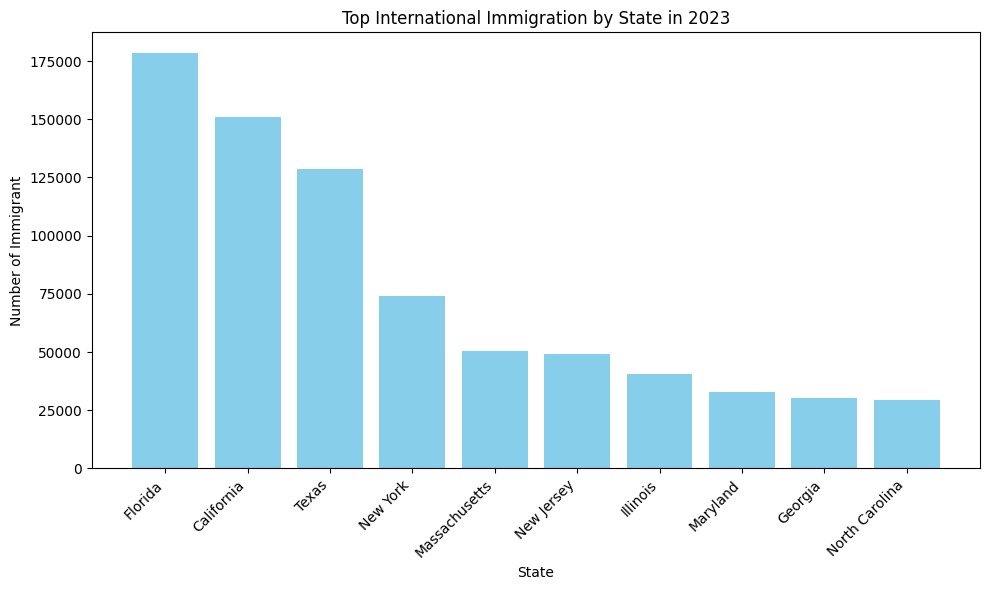

In [ ]:
import matplotlib.pyplot as plt

# size
plt.figure(figsize=(10, 6))

# assign data for plotting
states = df_top_state_int_immigrant.head(10)['State']
people = df_top_state_int_immigrant.head(10)['INTERNATIONALMIG2023']

# Plot + color
plt.bar(states, people, color='skyblue')

# Title and labels
plt.title('Top International Immigration by State in 2023')
plt.xlabel('State')
plt.ylabel('Number of Immigrant')

# Adjusting labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

📢 **Summary of critical observations:**
The analysis reveals that states like Florida, California, Texas, New York, and Massachusetts are among the top 10 states with the highest international immigrant population in 2023.

*These states offer significant opportunities for education and employment, making them attractive destinations for international students and immigrants.*

**Q3.3.2. What is the cost-to-income ratio for each state?**






In [ ]:

# Calculate the total cost as a percentage of median income
main_df_state['total_cost_percentage'] = (main_df_state['total_cost'] / main_df_state['median_family_income']) * 100

# Display the updated DataFrame
main_df_state

,State,Abbreviation,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,INTERNATIONALMIG2023,total_cost_percentage
0,Alabama,AL,1p0c,6414.950821,3275.597499,10966.870205,5691.536371,3511.267841,0.000000,5672.986617,35533.209367,58099.871502,125.0,1806.0,4374.0,5384.0,61.158843
1,Alabama,AL,1p1c,8498.130792,4827.434642,11667.439888,8541.031239,4828.377883,5108.267991,5832.052646,49302.735116,58099.871502,125.0,1806.0,4374.0,5384.0,84.858596
2,Alabama,AL,2p2c,8498.130792,9465.854196,14213.029952,17082.062454,6509.060174,12667.575079,8778.431966,77214.144913,58099.871502,125.0,1806.0,4374.0,5384.0,132.898994
3,Alaska,AK,1p0c,10259.142857,3419.812766,10142.445480,6258.183450,4956.425057,0.000000,5447.650714,40483.659900,80510.056920,63.0,866.0,2339.0,1990.0,50.283979
4,Alaska,AK,1p1c,14435.571429,5037.211037,10820.664643,9392.514227,7055.757043,10725.754800,6816.143781,64283.616814,80510.056920,63.0,866.0,2339.0,1990.0,79.845449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wisconsin,WI,1p1c,9739.454877,4624.500642,11862.204232,7948.106267,5204.627567,9335.197123,6940.722945,55654.813583,74495.815864,215.0,3189.0,7906.0,13653.0,74.708644
146,Wisconsin,WI,2p2c,9739.454877,9067.931855,14893.677950,15896.212600,6814.657898,16041.765800,8886.865043,81340.565933,74495.815864,215.0,3189.0,7906.0,13653.0,109.188100
147,Wyoming,WY,1p0c,7681.043478,3449.503690,11839.099685,7201.375534,4033.036179,0.000000,5288.969838,39493.028765,78918.055027,18.0,134.0,364.0,322.0,50.043084
148,Wyoming,WY,1p1c,10105.043478,5083.730030,13067.244694,10804.511186,5503.491616,8474.587617,5835.672548,58874.281461,78918.055027,18.0,134.0,364.0,322.0,74.601790


# 1. For 1P0C(no children)

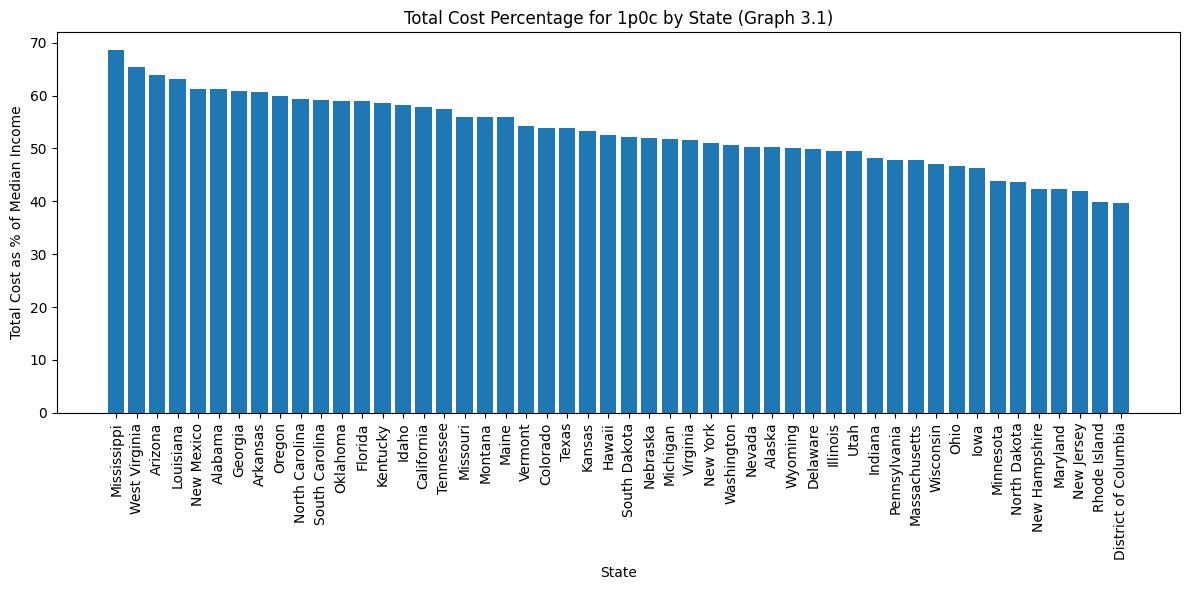

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for family_member_count of '1p0c'
filtered_df = main_df_state[main_df_state['family_member_count'] == '1p0c']

# Sort the filtered DataFrame in descending order based on total_cost_percentage
sorted_df = filtered_df.sort_values('total_cost_percentage', ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['State'], sorted_df['total_cost_percentage'])

# Set the x-label, y-label, and title
plt.xlabel('State')
plt.ylabel('Total Cost as % of Median Income')
plt.title('Total Cost Percentage for 1p0c by State (Graph 3.1)')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()

# For 1P1C(1 adult with 1 child)

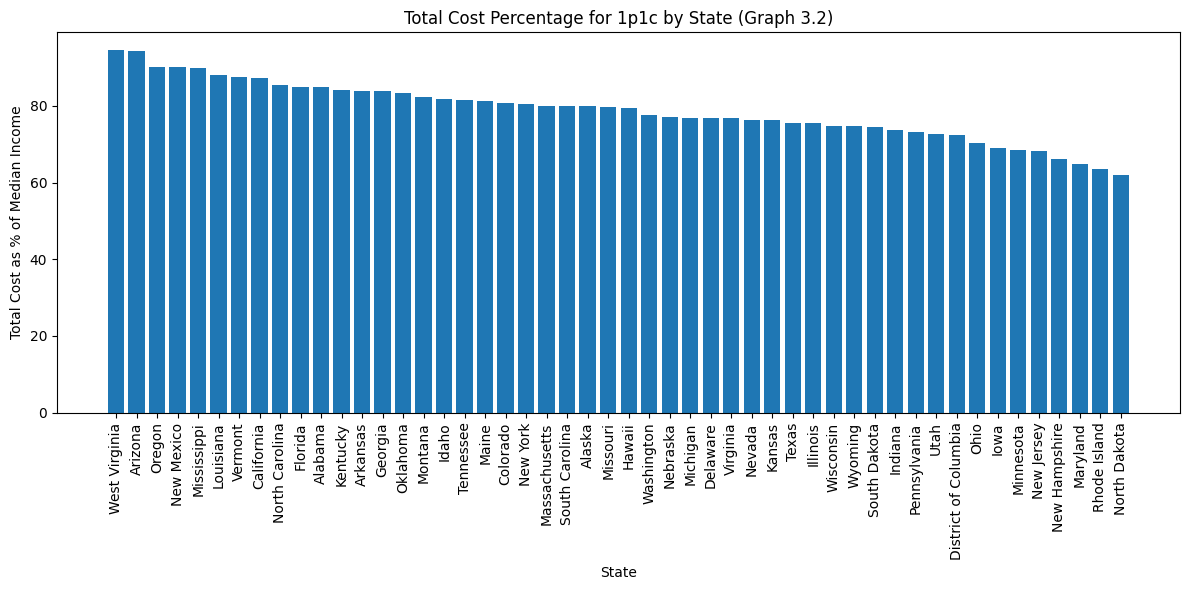

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for family_member_count of '1p1c'
filtered_df = main_df_state[main_df_state['family_member_count'] == '1p1c']

# Sort the filtered DataFrame in descending order based on total_cost_percentage
sorted_df = filtered_df.sort_values('total_cost_percentage', ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['State'], sorted_df['total_cost_percentage'])

# Set the x-label, y-label, and title
plt.xlabel('State')
plt.ylabel('Total Cost as % of Median Income')
plt.title('Total Cost Percentage for 1p1c by State (Graph 3.2)')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()

📢 **Summary of critical observations:**
The cost-to-income ratio varies across different states, indicating the affordability of living in each state relative to the income earned.

*   States(West Virginia) with higher cost-to-income ratios may pose greater financial challenges for residents, especially those with lower incomes.
*   Conversely, states(North Dakota) with lower ratios may offer a more favorable financial environment for residents in terms of affordability.



# For 2P2C(2 adults with 2 children)

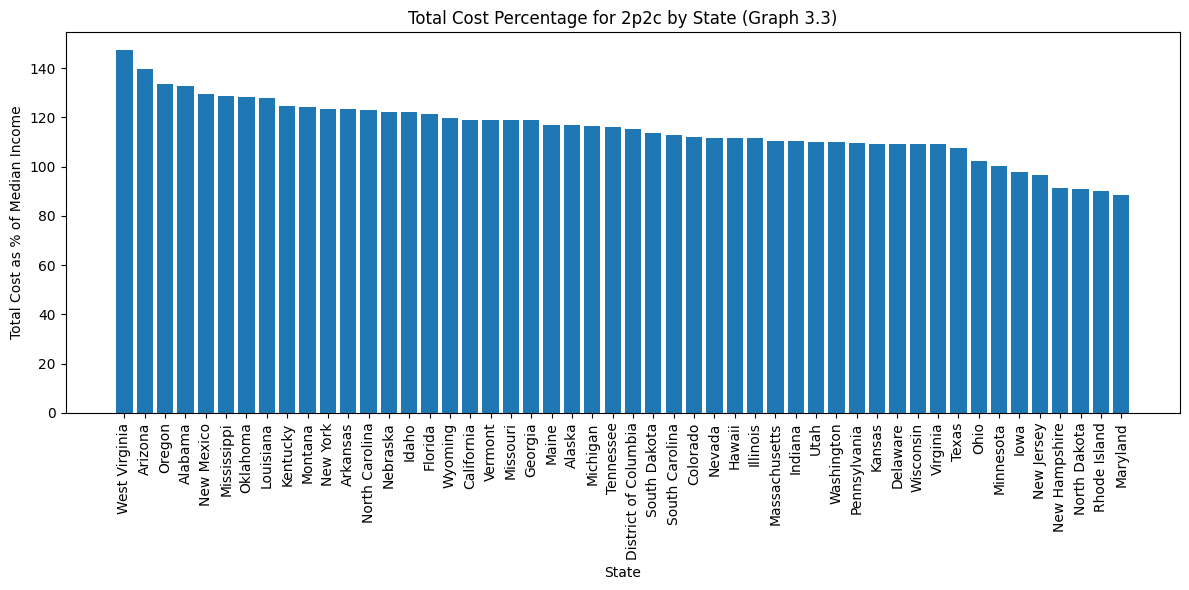

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for family_member_count of '2p2c'
filtered_df = main_df_state[main_df_state['family_member_count'] == '2p2c']

# Sort the filtered DataFrame in descending order based on total_cost_percentage
sorted_df = filtered_df.sort_values('total_cost_percentage', ascending=False)

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['State'], sorted_df['total_cost_percentage'])

# Set the x-label, y-label, and title
plt.xlabel('State')
plt.ylabel('Total Cost as % of Median Income')
plt.title('Total Cost Percentage for 2p2c by State (Graph 3.3)')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.show()

📢 **Summary of critical observations:**
The cost-to-income ratio varies across different states, indicating the affordability of living in each state relative to the income earned.

*   States(West Virginia) with higher cost-to-income ratios may pose greater financial challenges for residents, especially those with lower incomes.
*   Conversely, states(Maryland) with lower ratios may offer a more favorable financial environment for residents in terms of affordability.

**Q3.3.3 What is the average childcare cost in 1p0c households and 2p2c households?**


In [ ]:
average_childcare_cost_1p1c = main_df_state[main_df_state['family_member_count'] == '1p1c']['childcare_cost'].mean()
print(f"The average childcare cost for a 1p1c household across all states is: ${average_childcare_cost_1p1c:.2f}")


The average childcare cost for a 1p1c household across all states is: $7964.57


In [ ]:
average_childcare_cost_2p2c = main_df_state[main_df_state['family_member_count'] == '2p2c']['childcare_cost'].mean()
print(f"The average childcare cost for a 2p2c household across all states is: ${average_childcare_cost_2p2c:.2f}")

The average childcare cost for a 2p2c household across all states is: $14718.74


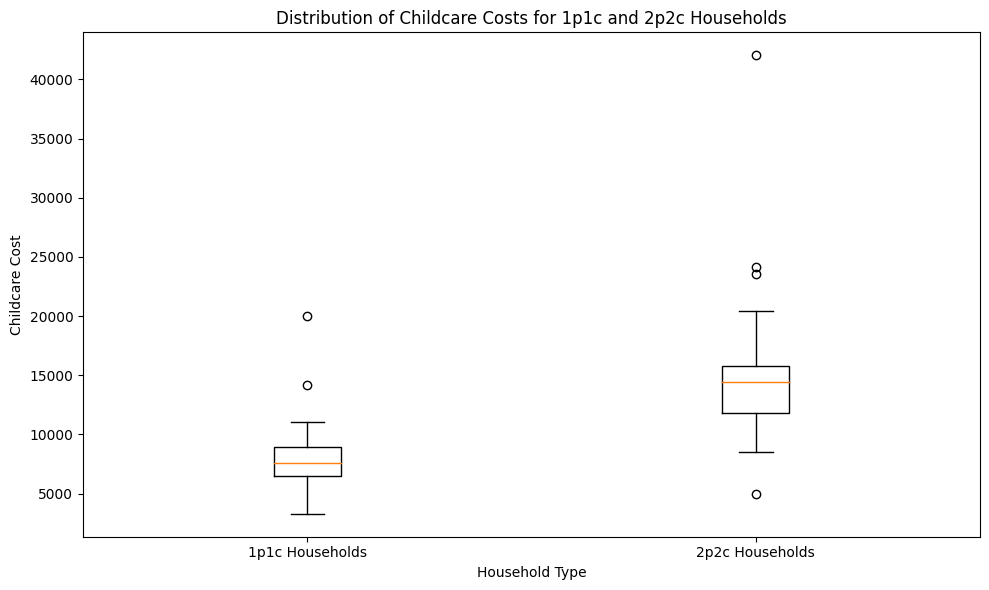

In [ ]:
# Filter the DataFrame for 1p1c and 2p2c households
df_1p1c = main_df_state[main_df_state['family_member_count'] == '1p1c']
df_2p2c = main_df_state[main_df_state['family_member_count'] == '2p2c']

# Create the box plot
plt.figure(figsize=(10, 6))
box_data = [df_1p1c['childcare_cost'], df_2p2c['childcare_cost']]
labels = ['1p1c Households', '2p2c Households']
plt.boxplot(box_data, labels=labels)

# Set the x-label, y-label, and title
plt.xlabel('Household Type')
plt.ylabel('Childcare Cost')
plt.title('Distribution of Childcare Costs for 1p1c and 2p2c Households')

# Display the graph
plt.tight_layout()
plt.show()

📢 **Summary of critical observations:**
The analysis highlights the average childcare costs in both 1p0c and 2p2c households, providing insights into the financial burden associated with childcare for different family configurations.

*   The average childcare cost for a 1p1c household across all states is: $7964.57

*   The average childcare cost for a 2p2c household across all states is: $14718.74

*Understanding these costs is essential for families, particularly for international students, as childcare expenses can significantly impact their overall cost of living and financial planning.*

**Q.3.3.4 What are the migration trends in states with highest international immigration?**

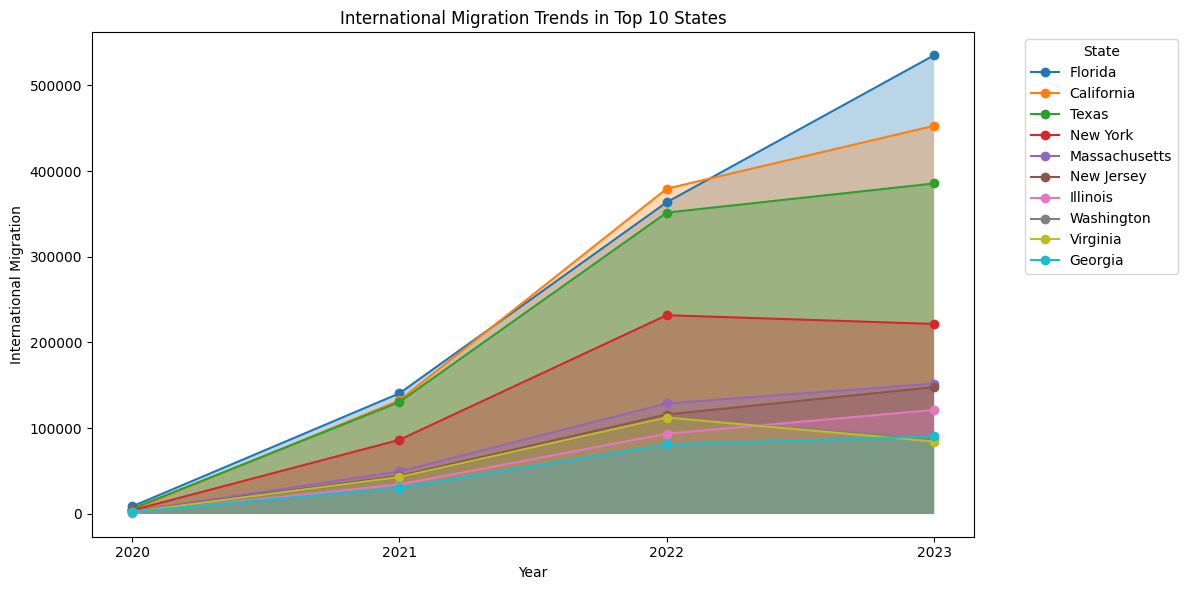

In [ ]:
import matplotlib.pyplot as plt

# Group the data by state and calculate the total migration for each year
state_migration = main_df.groupby('State')[['INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022', 'INTERNATIONALMIG2023']].sum()

# Calculate the total migration for each state across all years
state_migration['Total_Migration'] = state_migration.sum(axis=1)

# Get the top 10 states with the highest total migration
top_10_states = state_migration.nlargest(10, 'Total_Migration')

# Create an area chart
fig, ax = plt.subplots(figsize=(12, 6))

years = ['2020', '2021', '2022', '2023']

for state in top_10_states.index:
    migration_data = top_10_states.loc[state, ['INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022', 'INTERNATIONALMIG2023']]
    ax.plot(years, migration_data, marker='o', label=state)
    ax.fill_between(years, migration_data, alpha=0.3)

ax.set_xlabel('Year')
ax.set_ylabel('International Migration')
ax.set_title('International Migration Trends in Top 10 States')
ax.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**📢 Summary of critical observations:**

Florida has seen the largest increase in international migration, surpassing 500,000 by 2023 and far exceeding other states. This suggests Florida is a top destination for immigrants.

California and Texas are next highest, with migration over 400,000 by 2023, but their growth curves are less steep than Florida's. They remain major immigrant hubs but Florida is pulling ahead.

New York and Massachusetts round out the top 5, reaching around 300,000 and 200,000 respectively by 2023. The Northeast corridor remains a draw for international migrants.

New Jersey, Illinois, Washington, Virginia and Georgia are clustered fairly closely together in the 100,000-200,000 range by 2023. They see steady growth but remain well below the top states.

Growth has been fairly linear for most states, but Florida and Texas in particular are seeing an acceleration, with their curves becoming steeper in recent years.



**Q3.3.5 What is the proportion of Cost Components for Top 10 States with Highest International Migration?**

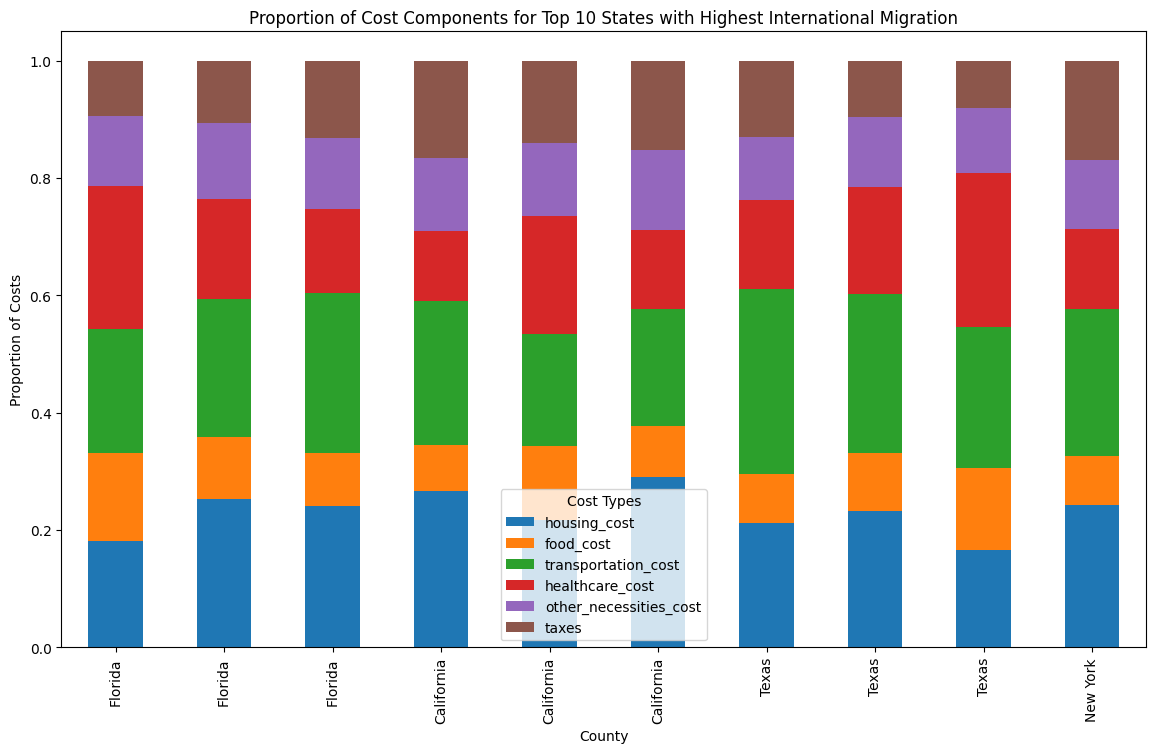

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Sort the DataFrame by the international migration rate for 2023
top_migrants = main_df_state.sort_values(by='INTERNATIONALMIG2023', ascending=False).head(10)

# Calculate the proportion of each cost component
cost_columns = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'taxes']
top_migrants[cost_columns] = top_migrants[cost_columns].div(top_migrants[cost_columns].sum(axis=1), axis=0)

# Plotting the proportions using a stacked bar chart
top_migrants.set_index('State')[cost_columns].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Cost Components for Top 10 States with Highest International Migration')
plt.xlabel('County')
plt.ylabel('Proportion of Costs')
plt.legend(title='Cost Types')
plt.show()

**Q3.3.6 How do the costs of living in High Migration areas comapre with that of low migration areas?**

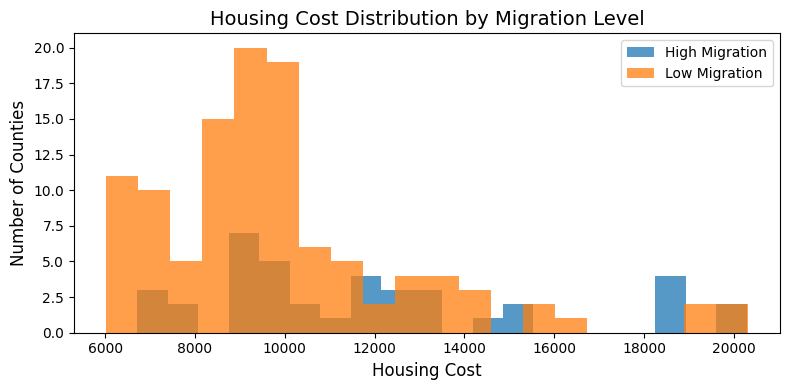

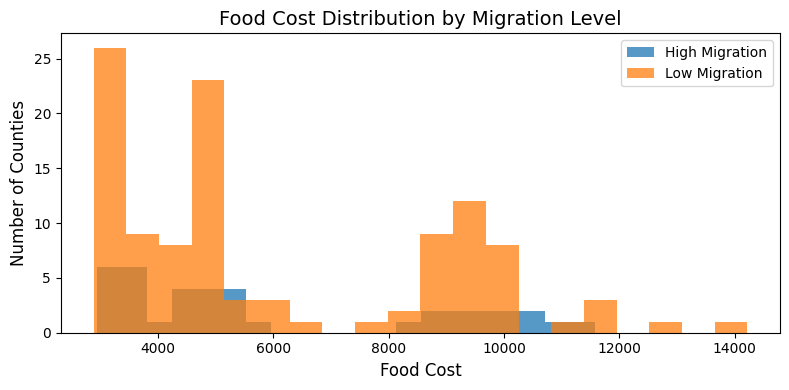

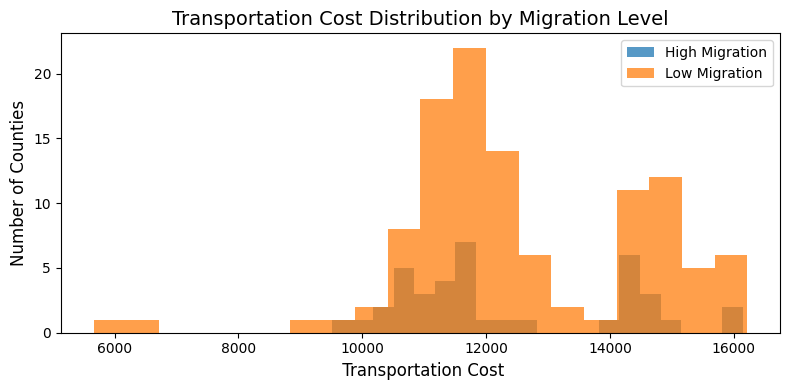

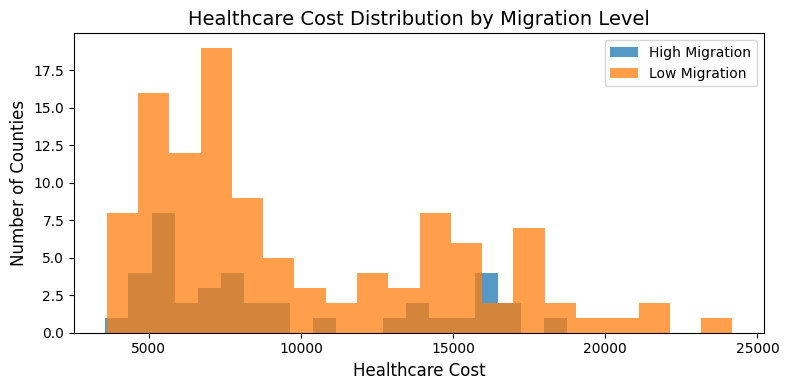

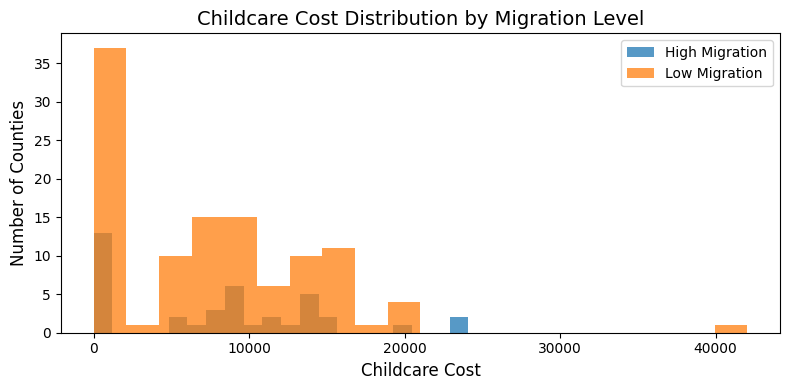

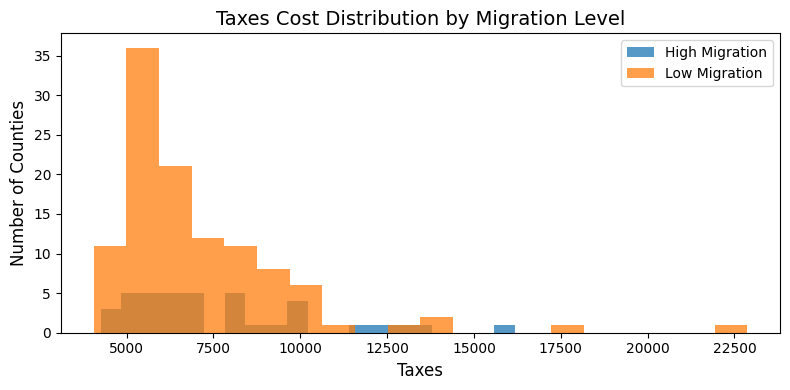

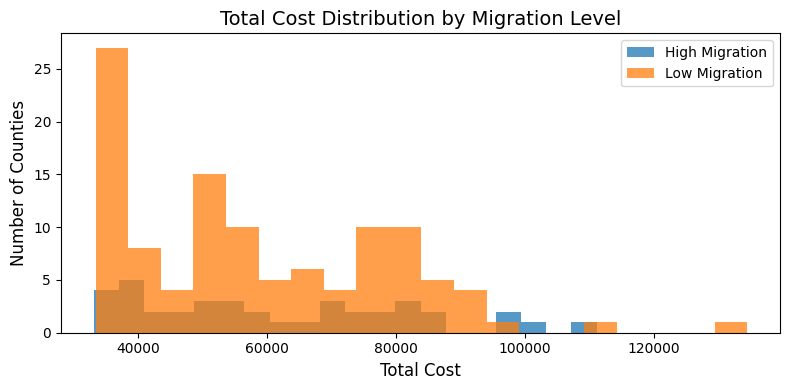

In [ ]:
import matplotlib.pyplot as plt

def plot_cost_distribution(df, cost_column, migration_column, title, xlabel, ylabel, figsize=(8, 4), bins=20):
    """Plots histograms for different migration levels for a specified cost category."""
    # Define a threshold for high international migration
    threshold = df[migration_column].quantile(0.75)

    # Create a new column for migration level
    df['Migration_Level'] = ['High' if x >= threshold else 'Low' for x in df[migration_column]]

    # Plotting costs for high vs. low migration counties
    plt.figure(figsize=figsize)
    for level in ['High', 'Low']:
        subset = df[df['Migration_Level'] == level]
        plt.hist(subset[cost_column], bins=bins, alpha=0.75, label=f'{level} Migration')

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()  # Adjusts plot parameters to give the plot elements sufficient room
    plt.show()


# Define the cost categories and respective labels
costs = ['housing_cost', 'food_cost','transportation_cost','healthcare_cost', 'childcare_cost', 'taxes', 'total_cost']
titles = ['Housing Cost Distribution by Migration Level', 'Food Cost Distribution by Migration Level', 'Transportation Cost Distribution by Migration Level',
          'Healthcare Cost Distribution by Migration Level', 'Childcare Cost Distribution by Migration Level', 'Taxes Cost Distribution by Migration Level', 'Total Cost Distribution by Migration Level']
x_labels = ['Housing Cost', 'Food Cost',' Transportation Cost','Healthcare Cost', 'Childcare Cost', 'Taxes', 'Total Cost']

# Loop through each cost type and generate a histogram
for cost, title, x_label in zip(costs, titles, x_labels):
    plot_cost_distribution(main_df_state, cost, 'INTERNATIONALMIG2023', title, x_label, 'Number of Counties')


📢 Summary of critical observations:

1. Housing Cost Distribution by Migration Level

  Housing Market Dynamics: The clustering of lower housing costs in high migration areas could be indicative of a housing market that is well-supplied, possibly through proactive development policies aimed at keeping housing affordable.

2. Food Cost Distribution by Migration Level

  Basic Needs Affordability: The lower range of food costs in high migration areas highlights the affordability of basic needs, which is a critical consideration for anyone looking to relocate.

3. Transportation Cost Distribution by Migration Level**

  Infrastructure Investment:The concentration of mid-range transportation costs in high migration areas could suggest investments in infrastructure that support a growing population without significantly increasing personal transportation costs.

4. Healthcare Cost Distribution by Migration Level

  Accessibility of Healthcare:** Lower healthcare costs in high migration counties could reflect better healthcare accessibility or efficient healthcare systems, which is an important factor in migration decisions.

5. Childcare Cost Distribution by Migration Level

  Family-Friendly Policies: Low childcare costs in high migration areas could point to family-friendly policies, which may be a deliberate strategy to attract working-age populations with children.

6. Taxes Cost Distribution by Migration Level

  Taxation and Social Infrastructure: Moderate tax burdens in high migration counties may reflect well-calibrated taxation that balances revenue with maintaining attractiveness for incoming populations. Lower taxes in low migration areas might indicate either less developed social services or incentives to attract new residents.

7. Total Cost Distribution by Migration Level

  Economic Pull Factors: A narrow peak in low total costs for high migration counties suggests these areas might have strong economic pull factors, attracting migrants with a combination of employment opportunities and lower living costs.

## Summary of Insights & Conclusion:


1. Cost of Living Components:
   - Insight: Housing and taxes are the primary drivers of living expenses, regardless of household size. This is particularly relevant for international students, who often live alone or with smaller families. Food costs remain relatively constant across family configurations, while transportation costs slightly increase with family size.
   - Recommendation: International students should prioritize housing and tax considerations when deciding where to live, as these factors have the most significant impact on their overall expenses and ability to manage student debt.

2. County-Level Analysis:
   - Insight: There is no direct correlation between median salary income and immigration rates, indicating that non-monetary factors influence migration decisions. Counties in Virginia, California, and Colorado offer the best income-cost differences for international students aiming to pay off debt.
   - Recommendation: International students should consider these counties for potential debt repayment opportunities. However, they should also take into account employment statistics, quality of life indices, and other factors such as proximity to educational institutions and support networks when making decisions.

3. State-Level Analysis:
   - Insight: The top states for international immigration in 2023 (Florida, California, Texas, New York, Massachusetts) offer substantial education and employment opportunities, which are crucial factors for international students. Cost-to-income ratios vary across states, with West Virginia being less affordable and North Dakota and Maryland being more affordable. Childcare costs are a significant consideration for international students with families.
   - Recommendation: International students should carefully evaluate the cost-to-income ratios and childcare expenses when considering relocating to different states. They should also consider the availability of educational opportunities, job prospects, and support services for international students in these states.

4. Migration Trends:
   - Insight: Florida has experienced the steepest growth in international migration, outpacing California and Texas. The Northeast corridor (New York, Massachusetts) and other states like New Jersey, Illinois, Washington, Virginia, and Georgia see steady growth but remain below the top states. These trends indicate where international students are likely to find larger communities of fellow immigrants.
   - Recommendation: International students should consider these migration trends when deciding where to settle, as larger immigrant communities can provide valuable support networks and resources. However, they should also be aware that high-growth states may experience challenges in maintaining affordability and infrastructure.

5. Cost Comparison between High and Low Migration Areas:
   - Insight: High migration areas generally have lower costs for housing, food, healthcare, and childcare compared to low migration areas. This is particularly beneficial for international students who are managing student debt and living expenses. These areas often have well-supplied housing markets, affordable basic needs, robust infrastructure, accessible healthcare, and family-friendly policies.
   - Recommendation: International students should consider settling in high migration areas to take advantage of the lower costs of living and the presence of support networks. However, they should also research the specific policies and resources available for international students in these areas.

In conclusion, this analysis provides international students with valuable insights to make informed decisions about living expenses, migration, and managing student debt across different counties and states in the United States. By considering the key findings and recommendations, international students can work towards creating more affordable and attractive living environments while effectively balancing their education, career, and financial goals. It is essential for international students to carefully evaluate their individual circumstances and priorities when making these decisions, taking into account factors such as educational opportunities, employment prospects, support networks, and overall quality of life.